In [ ]:
from lxml import etree

In [ ]:
from typing import List, Tuple

In [ ]:
def load_sentirueval_2016(file_name: str) -> Tuple[List[str], List[str]]:
    texts = []
    labels = []
    with open(file_name, mode='rb') as fp:
        xml_data = fp.read()
    root = etree.fromstring(xml_data)
    for database in root.getchildren():
        if database.tag == 'database':
            for table in database.getchildren():
                if table.tag != 'table':
                    continue
                new_text = None
                new_label = None
                for column in table.getchildren():
                    if column.get('name') == 'text':
                        new_text = str(column.text).strip()
                        if new_label is not None:
                            break
                    elif column.get('name') not in {'id', 'twitid', 'date'}:
                        if new_label is None:
                            label_candidate = str(column.text).strip()
                            if label_candidate in {'0', '1', '-1'}:
                                new_label = 'negative' if label_candidate == '-1' else \
                                    ('positive' if label_candidate == '1' else 'neutral')
                                if new_text is not None:
                                    break
                if (new_text is None) or (new_label is None):
                    raise ValueError('File `{0}` contains some error!'.format(file_name))
                texts.append(new_text)
                labels.append(new_label)
            break
    return texts, labels

In [ ]:
texts, labels = load_sentirueval_2016('bank_train_2016.xml')

In [ ]:
print('Number of texts is {0}, number of labels is {1}.'.format(len(texts), len(labels)))

Number of texts is 9392, number of labels is 9392.


Не спешите закрывать, всё самое интересное в конце после вашго кода

In [ ]:
import random

In [ ]:
for idx in random.choices(list(range(len(texts))), k=20):
    print('{0} => {1}'.format(labels[idx], texts[idx]))

neutral => Получить кредитную карту втб 24 http://t.co/8uFbvSzyrp
negative => Вот вам и безопасность карт с чипом... Да, @alfa_bank ? http://t.co/xvglKJh2S3
neutral => RT @marina_saniram: В связи с внесением Сбербанка в список ЕС, Сбербанк заявляет http://t.co/6l0YvPW0nk http://t.co/eYPiVvYeZa
neutral => Я.Новости | Финансы: Банк Москвы продает белорусскую «дочку» http://t.co/KqeXWbr0pi
neutral => банковская кредитная карта сбербанк http://t.co/ZhgczwmVxz
neutral => http://t.co/XM9W09GNcI Взять потребительский кредит в альфа банке
neutral => http://t.co/WsaDfDH1Ms втб 24 ростов на дону кредитная карта http://t.co/faF1PnZoYn
neutral => кредит на покупку автомобиля рубли сбербанк http://t.co/hrJpxYpSJu
neutral => RT @maglov: Александр Дюков: Политическое решение уже принято — Крым в составе РФ. Но тем не менее «Газпром», «Роснефть», РЖД, Сбербанк в К…
positive => С 1 августа Сбербанк начнет выдавать кредиты на покупку недвижимости в Хорватии
neutral => RT @TravaxIke: Сбербанк и Российска

In [ ]:
positive_tweets = [texts[idx] for idx in range(len(texts)) if labels[idx] == 'positive']
negative_tweets = [texts[idx] for idx in range(len(texts)) if labels[idx] == 'negative']

In [ ]:
for cur in positive_tweets[:5]: print(cur)

@sawik_shuster @YevhenS Главное чтоб банки СБЕР и ВТБ!!!
Самый выгодный автокредит в втб 24 http://t.co/CDJ5P40x7g
http://t.co/h6r6GdBe4H Легко можно получить денежный кредит ы втб 24 банке
Снижение процентной ставки по кредиту на недвижимость сбербанк http://t.co/MredO898wK
В наш сбербанк пришел американец и попросил сфоткаться с ним у банкомата ;D 
я ваще была в шоке и на фотке полюбому получилась смешная xD


In [ ]:
for cur in negative_tweets[:5]: print(cur)

@ShtirliZ_ @Zhukova_olga @winzard @tereshenkov обязательно про сбербанк напишите! Временами похлеще интернет магазинов финты выкручивает)
@Umka_75 @Alfarius2012 @igor_sechin втб и сбер точно. вопрос-блокировка операций или запрет на кредиты?
Канада ввела санкции против Газпромбанка, ВЭБа, Новатэка и российских оборонных компаний
RT @letokot: Если Сбер и ВТБ попали под санкции, будет жопа
RT @360_tv_ru: #Канада ввела санкции против 10 оборонных и сырьевых компаний и банков #РФ. Среди них, в частности, "#Газпромбанк", "#Внешэк…


In [ ]:
from nltk import word_tokenize

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer(lowercase=True, tokenizer=word_tokenize)

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
vectorizer.fit(texts)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


CountVectorizer(tokenizer=<function word_tokenize at 0x7f883eac0200>)

In [ ]:
print(vectorizer.get_feature_names()[0:20])

['!', '#', '$', '%', '&', "''", '(', ')', '*', '+', '+3,49', '+300', '+5тыс', '+74955102933', '+в', ',', '-', '--', '-4.8', '-5']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(len(vectorizer.get_feature_names()))

20192


In [ ]:
X = vectorizer.transform(texts)

In [ ]:
print(texts[0])

http://t.co/YEVHuvVGA1 Взять кредит тюмень альфа банк


In [ ]:
print(X[0])

  (0, 6318)	1
  (0, 7196)	1
  (0, 7773)	1
  (0, 9092)	1
  (0, 9293)	1
  (0, 9861)	1
  (0, 12787)	1
  (0, 19011)	1


In [ ]:
print(vectorizer.get_feature_names()[6321])

//t.co/yfqcav48qj


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
transformer = TfidfTransformer().fit(X)

In [ ]:
X_transformed = transformer.transform(X)

In [ ]:
print(X_transformed[0])

  (0, 19011)	0.5196767551267244
  (0, 12787)	0.17477128797745156
  (0, 9861)	0.2815132193133801
  (0, 9293)	0.20528209436889633
  (0, 9092)	0.26133550987375115
  (0, 7773)	0.10105340406350267
  (0, 7196)	0.09241786572867976
  (0, 6318)	0.7006793382592054


In [ ]:
print(vectorizer.get_feature_names()[19056])

уверил


In [ ]:
tokens_with_IDF = list(zip(vectorizer.get_feature_names(), transformer.idf_))

In [ ]:
for feature, idf in tokens_with_IDF[0:20]: print('{0:.6f} => {1}'.format(idf, feature))

4.417620 => !
3.144655 => #
6.276519 => $
5.636861 => %
5.647910 => &
4.134005 => ''
4.805386 => (
4.443938 => )
8.201810 => *
9.049108 => +
9.454573 => +3,49
9.454573 => +300
9.454573 => +5тыс
9.454573 => +74955102933
9.454573 => +в
2.753227 => ,
4.420872 => -
8.761426 => --
9.454573 => -4.8
9.454573 => -5


In [ ]:
sorted_tokens_with_IDF = sorted(tokens_with_IDF, key=lambda it: (-it[1], it[0]))

In [ ]:
for feature, idf in sorted_tokens_with_IDF[0:20]: print('{0:.6f} => {1}'.format(idf, feature))

9.454573 => +3,49
9.454573 => +300
9.454573 => +5тыс
9.454573 => +74955102933
9.454573 => +в
9.454573 => -4.8
9.454573 => -5
9.454573 => -6.4
9.454573 => -а
9.454573 => -круто
9.454573 => -осуществление
9.454573 => -подключение
9.454573 => -привлечение
9.454573 => -разменяйте
9.454573 => -россельхозбанка
9.454573 => -сами
9.454573 => -сервис
9.454573 => -сын
9.454573 => -то
9.454573 => -филиал


In [ ]:
from sklearn.feature_selection import SelectPercentile, chi2

In [ ]:
selector = SelectPercentile(chi2, percentile=20)

In [ ]:
selector.fit(X_transformed, labels)

SelectPercentile(percentile=20, score_func=<function chi2 at 0x7f883c18e9e0>)

In [ ]:
selected_tokens_with_IDF = [tokens_with_IDF[idx] for idx in selector.get_support(indices=True)]

In [ ]:
print(len(selected_tokens_with_IDF))

4039


In [ ]:
for feature, idf in selected_tokens_with_IDF[0:20]: print('{0:.6f} => {1}'.format(idf, feature))

4.417620 => !
3.144655 => #
5.636861 => %
4.134005 => ''
4.805386 => (
4.443938 => )
8.201810 => *
9.049108 => +
9.454573 => +5тыс
2.753227 => ,
4.420872 => -
9.454573 => -россельхозбанка
3.189272 => .
5.465589 => ..
3.819783 => ...
7.103198 => ....
9.454573 => ._
6.070183 => /
9.454573 => //t.co/01ftjc0bur
9.454573 => //t.co/0gfmj3s0gi


In [ ]:
selected_and_sorted_tokens_with_IDF = sorted(selected_tokens_with_IDF, key=lambda it: (-it[1], it[0]))

In [ ]:
for feature, idf in selected_and_sorted_tokens_with_IDF[0:20]: print('{0:.6f} => {1}'.format(idf, feature))

9.454573 => +5тыс
9.454573 => -россельхозбанка
9.454573 => ._
9.454573 => //t.co/01ftjc0bur
9.454573 => //t.co/0gfmj3s0gi
9.454573 => //t.co/0i4pf81ksd
9.454573 => //t.co/0jzv0jq959
9.454573 => //t.co/0lt5jdmk9l
9.454573 => //t.co/0s03a0v7po
9.454573 => //t.co/0ttwpnjnef
9.454573 => //t.co/0vpcvumoe8
9.454573 => //t.co/0wziwezr91
9.454573 => //t.co/0y05qjok2q
9.454573 => //t.co/1aa3jpbxqh
9.454573 => //t.co/1cjshtzrda
9.454573 => //t.co/1d3bb71qbt
9.454573 => //t.co/1eodyxqq0a
9.454573 => //t.co/1fxzerzsps
9.454573 => //t.co/1kiwdyic6t
9.454573 => //t.co/1mymy2lxfu


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
cls = LogisticRegression(solver='liblinear', verbose=True)

In [ ]:
X_transformed_and_selected = selector.transform(X_transformed)

In [ ]:
cls.fit(X_transformed_and_selected, labels)

[LibLinear]

LogisticRegression(solver='liblinear', verbose=True)

In [ ]:
classes_list = list(cls.classes_)

In [ ]:
print(classes_list)

['negative', 'neutral', 'positive']


In [ ]:
texts_for_testing, labels_for_testing = load_sentirueval_2016('banks_test_etalon.xml')

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipeline_for_se = Pipeline(
    [
        ('vectorizer', vectorizer),
        ('tfidf', transformer),
        ('selector', selector),
        ('final_classifier', cls)
    ]
)

In [ ]:
from sklearn.metrics import roc_curve
import numpy as np

In [ ]:
probabilities = pipeline_for_se.predict_proba(texts_for_testing)

In [ ]:
y_true_positives = list(map(lambda it: 1 if it == 'positive' else 0, labels_for_testing))
y_score_positives = probabilities[:, classes_list.index('positive')]

In [ ]:
fpr_positives, tpr_positives, _, = roc_curve(y_true_positives, y_score_positives)

In [ ]:
y_true_negatives = list(map(lambda it: 1 if it == 'negative' else 0, labels_for_testing))
y_score_negatives = probabilities[:, classes_list.index('negative')]
fpr_negatives, tpr_negatives, _, = roc_curve(y_true_negatives, y_score_negatives)

In [ ]:
y_true_neutrals = list(map(lambda it: 1 if it == 'neutral' else 0, labels_for_testing))
y_score_neutrals = probabilities[:, classes_list.index('neutral')]
fpr_neutrals, tpr_neutrals, _, = roc_curve(y_true_neutrals, y_score_neutrals)

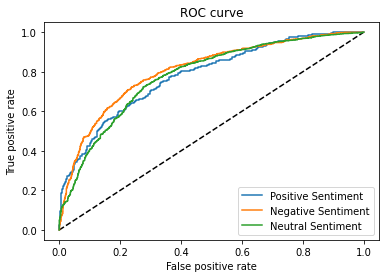

In [ ]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_positives, tpr_positives, label='Positive Sentiment')
plt.plot(fpr_negatives, tpr_negatives, label='Negative Sentiment')
plt.plot(fpr_neutrals, tpr_neutrals, label='Neutral Sentiment')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.metrics import f1_score
predicted_labels = pipeline_for_se.predict(texts_for_testing)
print('F1-micro = {0:.6f}'.format(f1_score(labels_for_testing, predicted_labels, average='micro')))
print('F1-macro = {0:.6f}'.format(f1_score(labels_for_testing, predicted_labels, average='macro')))

F1-micro = 0.731059
F1-macro = 0.499757


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(labels_for_testing, predicted_labels, digits=6))

              precision    recall  f1-score   support

    negative   0.593323  0.509778  0.548387       767
     neutral   0.766298  0.898123  0.826990      2238
    positive   0.677419  0.068182  0.123894       308

    accuracy                       0.731059      3313
   macro avg   0.679014  0.492028  0.499757      3313
weighted avg   0.717990  0.731059  0.697125      3313



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
f1_macro_scorer = make_scorer(f1_score, average='macro')
cv = GridSearchCV(
    estimator=LogisticRegression(solver='liblinear'),
    param_grid={'C': [1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3], 'penalty': ['l1', 'l2']},
    scoring=f1_macro_scorer,
    n_jobs=-1
)

In [ ]:
cv.fit(X_transformed_and_selected, labels)

GridSearchCV(estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10.0, 100.0, 1000.0],
                         'penalty': ['l1', 'l2']},
             scoring=make_scorer(f1_score, average=macro))

In [ ]:
print(cv.best_params_)

{'C': 100.0, 'penalty': 'l2'}


In [ ]:
best_cls = LogisticRegression(solver='liblinear', verbose=True, C=10.0, penalty='l1')
best_cls.fit(X_transformed_and_selected, labels)

[LibLinear]

LogisticRegression(C=10.0, penalty='l1', solver='liblinear', verbose=True)

In [ ]:
best_pipeline_for_se = Pipeline(
    [
        ('vectorizer', vectorizer),
        ('tfidf', transformer),
        ('selector', selector),
        ('final_classifier', best_cls)
    ]
)

In [ ]:
probabilities = best_pipeline_for_se.predict_proba(texts_for_testing)

y_true_positives = list(map(lambda it: 1 if it == 'positive' else 0, labels_for_testing))
y_score_positives = probabilities[:, classes_list.index('positive')]
fpr_positives, tpr_positives, _, = roc_curve(y_true_positives, y_score_positives)

y_true_negatives = list(map(lambda it: 1 if it == 'negative' else 0, labels_for_testing))
y_score_negatives = probabilities[:, classes_list.index('negative')]
fpr_negatives, tpr_negatives, _, = roc_curve(y_true_negatives, y_score_negatives)

y_true_neutrals = list(map(lambda it: 1 if it == 'neutral' else 0, labels_for_testing))
y_score_neutrals = probabilities[:, classes_list.index('neutral')]
fpr_neutrals, tpr_neutrals, _, = roc_curve(y_true_neutrals, y_score_neutrals)

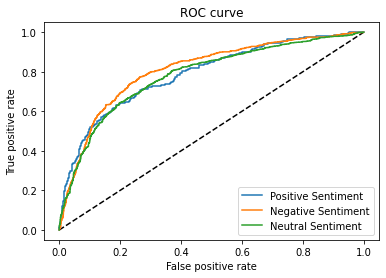

In [ ]:
plt.figure(2)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_positives, tpr_positives, label='Positive Sentiment')
plt.plot(fpr_negatives, tpr_negatives, label='Negative Sentiment')
plt.plot(fpr_neutrals, tpr_neutrals, label='Neutral Sentiment')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
predicted_labels = best_pipeline_for_se.predict(texts_for_testing)
print('F1-micro = {0:.6f}'.format(f1_score(labels_for_testing, predicted_labels, average='micro')))
print('F1-macro = {0:.6f}'.format(f1_score(labels_for_testing, predicted_labels, average='macro')))

F1-micro = 0.724721
F1-macro = 0.587182


In [ ]:
print(classification_report(labels_for_testing, predicted_labels, digits=6))

              precision    recall  f1-score   support

    negative   0.584828  0.552803  0.568365       767
     neutral   0.798126  0.837355  0.817270      2238
    positive   0.429167  0.334416  0.375912       308

    accuracy                       0.724721      3313
   macro avg   0.604040  0.574858  0.587182      3313
weighted avg   0.714444  0.724721  0.718614      3313



Итак, попробуем сделать алгортим лучше и посмотрим, что получится. Начнём с лемматизации и токенезации

In [ ]:
! pip install spacy-udpipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 304 kB 3.9 MB/s 
  Created wheel for ufal.udpipe: filename=ufal.udpipe-1.2.0.3-cp37-cp37m-linux_x86_64.whl size=5626650 sha256=9f8ba6bb18e1214f2c541c2f1d4773502b89101aeeacb2fb3b076e8178332dee
  Stored in directory: /root/.cache/pip/wheels/b8/b5/8e/3da091629a21ce2d10bf90759d0cb034ba10a5cf7a01e83d64
Successfully built ufal.udpipe


In [ ]:
import spacy_udpipe

spacy_udpipe.download("ru")
nlp = spacy_udpipe.load("ru")
doc = nlp("Мама мыла раму")
for token in doc:
  print(token.text, token.lemma_)

Downloaded pre-trained UDPipe model for 'ru' language
Мама мама
мыла мыть
раму рама


In [ ]:
def my_lemma_tokenize(text:str) -> List[str]:
  list_of_words = []
  doc = nlp(text)
  for token in doc:
    list_of_words.append(token.lemma_)
  return list_of_words

In [ ]:
my_lemma_tokenize('Я пишу программу')

['я', 'писать', 'программа']

In [ ]:
vectorizer = CountVectorizer(lowercase=True, tokenizer=my_lemma_tokenize) 

In [ ]:
vectorizer.fit(texts)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


CountVectorizer(tokenizer=<function my_lemma_tokenize at 0x7f8768db6950>)

In [ ]:
print(vectorizer.get_feature_names()[0:50])

['!', '"', '#', '#1000aday', '#1042', '#13268', '#171', '#187', '#24', '#40', '#41', '#8220', '#8221', '#8230', '#card', '#ekb', '#ff', '#g', '#hny', '#in', '#ipad', '#iphone', '#k', '#klerk', '#mol', '#moneyzzz', '#motox', '#msci', '#nsk', '#pyd', '#r', '#rt', '#ru', '#ru_ff', '#the', '#ua', '#vk', '#wall', '#ykt', '#аст', '#бут', '#в', '#ввп', '#вс', '#все', '#втб', '#втб24', '#втбый', '#вэб', '#гд']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(len(vectorizer.get_feature_names()))

16157


In [ ]:
X = vectorizer.transform(texts)

Добавим в матрицу показатели наличия ссылки на канал и тональность (0-отрицательная, 0,5-нейтральная, 1-положительная)


In [ ]:
import re

tg_channel = re.compile('(http[s]?:)?\/\/t\.co')
tg_tweets = []
tg_labels = []
for idx in range(len(texts)):
  if tg_channel.search(texts[idx]) is not None:
    tg_tweets.append(texts[idx])
    tg_labels.append(labels[idx])

In [ ]:
with open("RuSentiLex.txt", "r", encoding="utf-8") as file:
  positive_list=[]
  negative_list=[]
  neutral_list=[]
  for row in file.readlines():
    if row[0] == '!':
      pass
    else:
      row = row.split(', ')
      if 'positive' in row:
        positive_list.append(row[0])
      elif 'negative' in row:
        negative_list.append(row[0])
      elif 'neutral' in row:
        neutral_list.append(row[0])


Теперь нужно проверить, как посчитанная тональность соотносится с уже готовым списком окрашенной лексики

In [ ]:
c=0
for idx in range(len(texts)):
  doc = nlp(texts[idx].lower())
  positive=0
  negative=0
  neutral=0
  for token in doc:
    lemma=token.lemma_
    if lemma in positive_list:
      positive+=1
    if lemma in negative_list:
      negative+=1
    if lemma in neutral_list:
      neutral+=1
  emo_score = list(zip([k/len(doc) for k in [positive, negative, neutral]], ["positive", "negative", "neutral"]))
  for duo in emo_score:
    if duo[0] == max([i[0] for i in emo_score]):
      if duo[1] == labels[idx]:
        c+=1
print(c/len(texts))

1.0


Впечатляет

In [ ]:
import numpy as np

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer().fit(X)
X_transformed = transformer.transform(X) 
print(f'Матрица:\nномер токена в словаре - tf слова\n{X_transformed[0]}')

Матрица:
номер токена в словаре - tf слова
  (0, 15341)	0.5324263568629732
  (0, 11584)	0.15073313902476837
  (0, 9627)	0.28144899379578087
  (0, 9449)	0.17206567469236075
  (0, 9299)	0.26390299681043833
  (0, 8257)	0.7178696059005679


In [ ]:
X_arr = X_transformed.toarray()
n,m = X_arr.shape
print(n,m)

9392 16157


In [ ]:
tg_channel = re.compile('(http[s]?:)?\/\/t\.co')
X0 = np.zeros((n, 1))
for idx in range(len(texts)):
  if tg_channel.search(texts[idx]) is not None:
    X0[idx] = 1

Xnew = np.hstack((X_arr,X0))
print(Xnew)

[[0.         0.         0.         ... 0.         0.         1.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.22729295 ... 0.         0.         1.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [ ]:
X1 = np.zeros((n, 1))
for idx in range(len(texts)):
  doc = nlp(texts[idx].lower())
  positive=0
  negative=0
  neutral=0
  for token in doc:
    lemma=token.lemma_
    if lemma in positive_list:
      positive+=1
    if lemma in negative_list:
      negative+=1
    if lemma in neutral_list:
      neutral+=1
  emo_score = list(zip([k/len(doc) for k in [positive, negative, neutral]], ["positive", "negative", "neutral"]))
  for duo in emo_score:
    if max([i for i in emo_score]) != 0:
      if duo[0] == max([i[0] for i in emo_score]) and duo[0] != 0:
        if duo[1] == "positive":
          X1[idx] = 1
        elif duo[1] == "negative":
          X1[idx] = 0
        elif duo[1] == "neutral":
          X1[idx] = 0.5
    else:
      X1[idx] = 0.5

Xnew = np.hstack((Xnew,X1))
print(Xnew)

[[0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.22729295 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


Пора учиться

Логистическая регрессия с “пакетной” градиентной оптимизацей при обучении с подбором гиперпараметров с помощью перебора

In [ ]:
cls = LogisticRegression(solver='liblinear', verbose=True)

In [ ]:
from sklearn.feature_selection import SelectPercentile, chi2
selector = SelectPercentile(chi2, percentile=20)

In [ ]:
selector.fit(Xnew, labels)

SelectPercentile(percentile=20, score_func=<function chi2 at 0x7f883c18e9e0>)

In [ ]:
tokens_with_IDF = list(zip(vectorizer.get_feature_names(), transformer.idf_))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
for feature, idf in tokens_with_IDF[0:50]: print('{0:.6f} => {1}'.format(idf, feature))

4.424135 => !
4.088597 => "
3.229025 => #
9.454573 => #1000aday
9.454573 => #1042
9.454573 => #13268
9.454573 => #171
9.454573 => #187
9.454573 => #24
9.454573 => #40
9.454573 => #41
9.049108 => #8220
9.049108 => #8221
6.536802 => #8230
9.454573 => #card
9.454573 => #ekb
9.049108 => #ff
9.454573 => #g
9.454573 => #hny
9.049108 => #in
9.049108 => #ipad
8.538282 => #iphone
9.454573 => #k
9.454573 => #klerk
9.049108 => #mol
9.454573 => #moneyzzz
9.454573 => #motox
9.049108 => #msci
9.454573 => #nsk
9.454573 => #pyd
8.201810 => #r
8.201810 => #rt
9.049108 => #ru
8.761426 => #ru_ff
8.355961 => #the
9.454573 => #ua
8.355961 => #vk
8.355961 => #wall
9.454573 => #ykt
9.454573 => #аст
9.454573 => #бут
8.538282 => #в
9.454573 => #ввп
9.454573 => #вс
9.454573 => #все
6.592372 => #втб
9.454573 => #втб24
9.454573 => #втбый
9.454573 => #вэб
9.454573 => #гд


In [ ]:
sorted_tokens_with_IDF = sorted(tokens_with_IDF, key=lambda it: (-it[1], it[0]))

In [ ]:
for feature, idf in sorted_tokens_with_IDF[0:20]: print('{0:.6f} => {1}'.format(idf, feature))

9.454573 => #1000aday
9.454573 => #1042
9.454573 => #13268
9.454573 => #171
9.454573 => #187
9.454573 => #24
9.454573 => #40
9.454573 => #41
9.454573 => #card
9.454573 => #ekb
9.454573 => #g
9.454573 => #hny
9.454573 => #k
9.454573 => #klerk
9.454573 => #moneyzzz
9.454573 => #motox
9.454573 => #nsk
9.454573 => #pyd
9.454573 => #ua
9.454573 => #ykt


In [ ]:
print(len(sorted_tokens_with_IDF))

16157


In [ ]:
selector.fit(X_transformed, labels)

SelectPercentile(percentile=20, score_func=<function chi2 at 0x7f883c18e9e0>)

In [ ]:
selected_tokens_with_IDF = [tokens_with_IDF[idx] for idx in selector.get_support(indices=True)]

In [ ]:
print(len(selected_tokens_with_IDF))

3232


In [ ]:
for feature, idf in selected_tokens_with_IDF[0:20]: print('{0:.6f} => {1}'.format(idf, feature))

4.424135 => !
4.088597 => "
3.229025 => #
9.454573 => #1042
9.454573 => #171
6.536802 => #8230
9.454573 => #ekb
9.049108 => #ff
9.049108 => #in
9.454573 => #klerk
9.049108 => #msci
8.201810 => #r
8.201810 => #rt
9.454573 => #ua
8.538282 => #в
6.592372 => #втб
9.454573 => #ед
9.454573 => #екб
8.761426 => #ес
9.454573 => #мск


In [ ]:
selected_and_sorted_tokens_with_IDF = sorted(selected_tokens_with_IDF, key=lambda it: (-it[1], it[0]))

In [ ]:
for feature, idf in selected_and_sorted_tokens_with_IDF[0:20]: print('{0:.6f} => {1}'.format(idf, feature))

9.454573 => #1042
9.454573 => #171
9.454573 => #ekb
9.454573 => #klerk
9.454573 => #ua
9.454573 => #ед
9.454573 => #екб
9.454573 => #мск
9.454573 => #н-лат
9.454573 => #ь
9.454573 => &lt;3
9.454573 => *^____^*
9.454573 => +5тысяча
9.454573 => ,#
9.454573 => ,что2
9.454573 => -депозит
9.454573 => -лидер
9.454573 => -офиса
9.454573 => ._
9.454573 => .ь


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
cls = LogisticRegression(solver='liblinear', verbose=True)

In [ ]:
X_transformed_and_selected = selector.transform(X_transformed)

In [ ]:
cls.fit(X_transformed_and_selected, labels)

[LibLinear]

LogisticRegression(solver='liblinear', verbose=True)

In [ ]:
classes_list = list(cls.classes_)

In [ ]:
print(classes_list)

['negative', 'neutral', 'positive']


In [ ]:
texts_for_testing, labels_for_testing = load_sentirueval_2016('banks_test_etalon.xml')

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipeline_logreg_grid = Pipeline(
    [
        ('vectorizer', vectorizer),
        ('tfidf', transformer),
        ('selector', selector),
        ('final_classifier', cls)
    ]
)

In [ ]:
from sklearn.metrics import roc_curve
import numpy as np

In [ ]:
probabilities_logreg_grid = pipeline_logreg_grid.predict_proba(texts_for_testing)

In [ ]:
predicted_labels_logreg_grid = pipeline_logreg_grid.predict(texts_for_testing)

Логистическая регрессия со стохастической градиентной оптимизацей при обучении с подбором гиперпараметров с помощью перебора

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
grid_sgd = GridSearchCV(
    estimator=SGDClassifier(loss='log'),
    param_grid={'alpha': [1e-4,1e-3,1e-2, 1e-1], 'penalty': ['l1', 'l2']},
    scoring=f1_macro_scorer,
    n_jobs=-1
)

In [ ]:
from time import time

In [ ]:
before=time()
grid_sgd.fit(X_transformed_and_selected, labels)
time_passed_grid_2=time()-before

In [ ]:
grid_sgd.best_params_

{'alpha': 0.0001, 'penalty': 'l1'}

In [ ]:
cls_sgd_grid = SGDClassifier(loss='log', alpha= 0.0001, penalty= 'l1')
before=time()
cls_sgd_grid.fit(X_transformed_and_selected, labels)
time_passed_sgd_1=time()-before

In [ ]:
pipeline_sgd_grid = Pipeline(
    [
        ('vectorizer', vectorizer),
        ('tfidf', transformer),
        ('selector', selector),
        ('final_classifier', cls_sgd_grid)
    ]
)

In [ ]:
probabilities_sgd_grid = pipeline_sgd_grid.predict_proba(texts_for_testing)

In [ ]:
predicted_labels_sgd_grid = pipeline_sgd_grid.predict(texts_for_testing)

Логистическая регрессия с “пакетной” градиентной оптимизацей при обучении с подбором гиперпараметров с помощью Байесовской оптимизации


In [ ]:
pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 3.4 MB/s 


In [ ]:
from skopt import BayesSearchCV

In [ ]:
bayes_logreg = BayesSearchCV(LogisticRegression(solver='liblinear'),
{
'C': [1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3],'penalty': ['l1', 'l2']},
n_iter=32,
random_state=0,
n_jobs=-1)

In [ ]:
before=time()
bayes_logreg.fit(X_transformed_and_selected, labels)
time_passed_bayes_1=time()-before

/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packa

In [ ]:
bayes_logreg.best_params_

OrderedDict([('C', 100.0), ('penalty', 'l2')])

In [ ]:
cls_logreg_bayes = LogisticRegression(solver='liblinear', verbose=True, C= 100, penalty= 'l2')
before=time()
cls_logreg_bayes.fit(X_transformed_and_selected, labels)
time_passed_logreg_2=time()-before

[LibLinear]

In [ ]:
pipeline_logreg_bayes = Pipeline(
    [
        ('vectorizer', vectorizer),
        ('tfidf', transformer),
        ('selector', selector),
        ('final_classifier', cls_logreg_bayes)
    ]
)

In [ ]:
probabilities_logreg_bayes = pipeline_logreg_bayes.predict_proba(texts_for_testing)

In [ ]:
predicted_labels_logreg_bayes=pipeline_logreg_bayes.predict(texts_for_testing)

Логистическая регрессия со стохастической градиентной оптимизацей при обучении с подбором гиперпараметров с помощью Байесовской оптимизации


In [ ]:
bayes_sgd = BayesSearchCV(SGDClassifier(loss='log'),
{
'alpha': [1e-4,1e-3,1e-2, 1e-1],'penalty': ['l1', 'l2']},
n_iter=32,
random_state=0,
n_jobs=-1)

In [ ]:
before=time()
bayes_sgd.fit(X_transformed_and_selected,labels)
time_passed_bayes_2=time()-before

/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packa

In [ ]:
bayes_sgd.best_params_

OrderedDict([('alpha', 0.0001), ('penalty', 'l1')])

In [ ]:
cls_sgd_bayes = SGDClassifier(loss='log', alpha=0.0001, penalty= 'l1')
before=time()
cls_sgd_bayes.fit(X_transformed_and_selected, labels)
time_passed_sgd_2=time()-before

In [ ]:
pipeline_sgd_bayes = Pipeline(
    [
        ('vectorizer', vectorizer),
        ('tfidf', transformer),
        ('selector', selector),
        ('final_classifier', cls_sgd_bayes)
    ]
)

In [ ]:
probabilities_sgd_bayes = pipeline_sgd_bayes.predict_proba(texts_for_testing)

In [ ]:
predicted_labels_sgd_bayes=pipeline_sgd_bayes.predict(texts_for_testing)

Сравним все 4 кривые

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
def build_roc_curve(probabilities,classifier:str,parameter_search:str):
  y_true_positives = list(map(lambda it: 1 if it == 'positive' else 0, labels_for_testing))
  y_score_positives = probabilities[:, classes_list.index('positive')]
  fpr_positives, tpr_positives, _, = roc_curve(y_true_positives, y_score_positives)
  y_true_negatives = list(map(lambda it: 1 if it == 'negative' else 0, labels_for_testing))
  y_score_negatives = probabilities[:, classes_list.index('negative')]
  fpr_negatives, tpr_negatives, _, = roc_curve(y_true_negatives, y_score_negatives)
  y_true_neutrals = list(map(lambda it: 1 if it == 'neutral' else 0, labels_for_testing))
  y_score_neutrals = probabilities[:, classes_list.index('neutral')]
  fpr_neutrals, tpr_neutrals, _, = roc_curve(y_true_neutrals, y_score_neutrals)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr_positives, tpr_positives, label='Positive Sentiment')
  plt.plot(fpr_negatives, tpr_negatives, label='Negative Sentiment')
  plt.plot(fpr_neutrals, tpr_neutrals, label='Neutral Sentiment')
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title(f'ROC curve for {classifier}, parameter search with {parameter_search} ')
  plt.legend(loc='best')

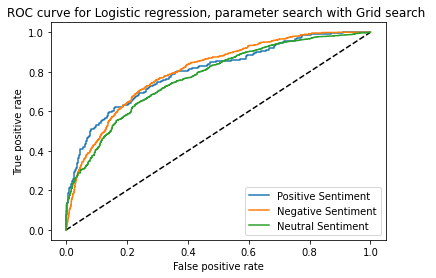

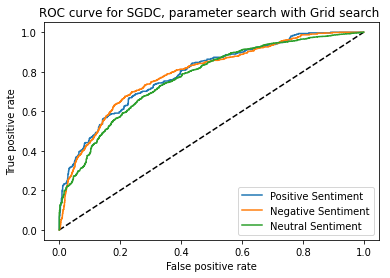

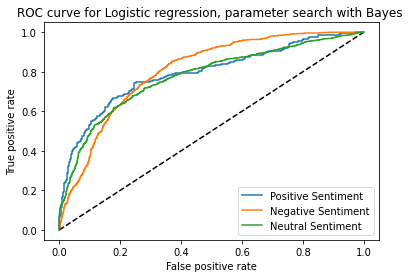

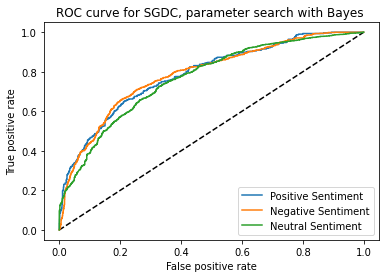

In [ ]:
plt.figure(1)
build_roc_curve(probabilities_logreg_grid,'Logistic regression','Grid search')
plt.figure(2)
plt.subplot=build_roc_curve(probabilities_sgd_grid,'SGDC','Grid search')
plt.figure(3)
plt.subplot=build_roc_curve(probabilities_logreg_bayes,'Logistic regression','Bayes')
plt.figure(4)
plt.subplot=build_roc_curve(probabilities_sgd_bayes,'SGDC','Bayes')
plt.show()

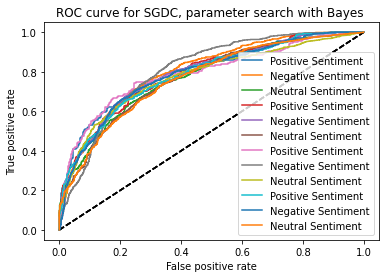

In [ ]:
build_roc_curve(probabilities_logreg_grid,'Logistic regression','Grid search')
plt.subplot=build_roc_curve(probabilities_sgd_grid,'SGDC','Grid search')
plt.subplot=build_roc_curve(probabilities_logreg_bayes,'Logistic regression','Bayes')
plt.subplot=build_roc_curve(probabilities_sgd_bayes,'SGDC','Bayes')
plt.show()

Как видим, ROC-кривые почти полностью накладываются друг на друга, то есть результаты работы разных алгоритмов довольно близки.

Сравним метрики (F1-micro и F1-macro) для всех четырёх случаев

In [ ]:
from tabulate import tabulate

In [ ]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix

In [ ]:
def recall(tp:int,fn:int) ->int:
  return tp/(tp+fn)
def precision(tp:int,fp:int) ->int:
  return tp/(tp+fp)
def f1(precision:int,recall:int) ->int:
  return 2*precision*recall/(precision+recall)

In [ ]:
def count_metrics(labels_for_testing, predicted_labels:List[str]) -> Tuple[int,int]:
  cm=confusion_matrix(labels_for_testing, predicted_labels)
  negative_tp=cm[0][0]
  negative_fn=cm[0][1]+cm[0][2]
  negative_fp=cm[1][0]+cm[2][0]
  negative_recall=recall(negative_tp,negative_fn)
  negative_precision=precision(negative_tp,negative_fp)
  negative_f1=f1(negative_precision,negative_recall)
  negative_recall,negative_precision,negative_f1
  positive_tp=cm[2][2]
  positive_fn=cm[2][0]+cm[2][1]
  positive_fp=cm[0][2]+cm[1][2]
  positive_recall=recall(positive_tp,positive_fn)
  positive_precision=precision(positive_tp,positive_fp)
  positive_f1=f1(positive_precision,positive_recall)
  positive_recall,positive_precision,positive_f1
  f1_macro=(positive_f1+negative_f1)/2
  precision_micro=precision(negative_tp+positive_tp,negative_fp+positive_fp)
  recall_micro=recall(negative_tp+positive_tp,negative_fn+positive_fn)
  f1_micro=f1(precision_micro,recall_micro)
  return round(f1_macro,3), round(f1_micro,3)

In [ ]:
print(tabulate([
    ['logistic regression','grid_search',count_metrics(labels_for_testing,predicted_labels_logreg_grid)],
    ['SGDC','grid_search',count_metrics(labels_for_testing,predicted_labels_sgd_grid)],
    ['logistic regression','Bayes',count_metrics(labels_for_testing,predicted_labels_logreg_bayes)],
    ['SGDC','Bayes',count_metrics(labels_for_testing,predicted_labels_sgd_bayes)]],
    headers= ['Classifier','Parameter Search',('F1-macro','F1-micro')]))

Classifier           Parameter Search    ('F1-macro', 'F1-micro')
-------------------  ------------------  --------------------------
logistic regression  grid_search         (0.347, 0.454)
SGDC                 grid_search         (0.422, 0.479)
logistic regression  Bayes               (0.456, 0.499)
SGDC                 Bayes               (0.428, 0.481)


Метрики говорят, что эффективнее всего работает пакетная реализация оптимизации при обучении в сочетании с подбором параметров с помощью Байесовской оптимизации. F1-micro во всех случаях оказалась выше, чем F1-macro. Для того, чтобы понять почему, сформируем classification report для результатов одного из алгоритмов, например, того,для которого эта разница наиболее заметна (SGDClassifier + BayesSearchSV).

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report (labels_for_testing, predicted_labels_sgd_bayes))

              precision    recall  f1-score   support

    negative       0.54      0.51      0.52       767
     neutral       0.78      0.85      0.81      2238
    positive       0.57      0.23      0.33       308

    accuracy                           0.72      3313
   macro avg       0.63      0.53      0.56      3313
weighted avg       0.70      0.72      0.70      3313



Итак, выводы:
1. Для определения тональности можно и нужно использовать готовые словари оценочной лексики
2. Пакетная реализация оптимизации при обучении в сочетании с подюором параметров с помощью Байесовской оптимизации дает лучший результат. 
3. Положительных твитов в 2,5 раза меньше, чем отрицательных. Положительные твиты классифицируются хуже (возможно,опять же, из-за ассиметрии классов, на что указывает низкая полнота), поэтому F1 для них ниже.
Продолжение для телекомов смотрите в следующем Jupyter-ноутбуке